# Name- Somen Das

# Task-2 Prediction using Unsupervised ML

## Question - Predict the optimum number of clusters and Visualize it.

For this task we are going to use the Iris dataset.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Loading and preparing data

In this section we are going to load our iris data and take a look on the features of the dataset. 

After that we create a dataframe of the iris data.

In [2]:
iris=load_iris()

In [3]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris['target'][:5]

array([0, 0, 0, 0, 0])

In [5]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Using elbow method

The elbow method is used to find the optimum number of clusters for kmeans.

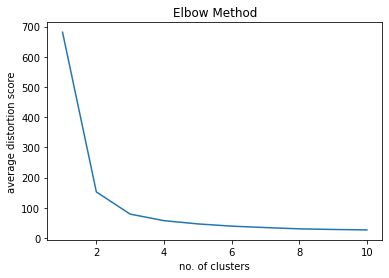

In [7]:

sse=[]
k_range=range(1,11)

for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris['data'])
    sse.append(kmeans.inertia_)
plt.plot(k_range,sse)
plt.title("Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("average distortion score")
plt.show()

 ##### Note: In the above graph the elbow point is 3. 

## Hence the optimum number of clusters is 3. 

#### Applying K-Means Classifier model

In this section we will create K-Means classifier and also find the centroids.

In [8]:
model=KMeans(n_clusters=3)
model.fit(iris['data'])     # fitting iris data

KMeans(n_clusters=3)

In [9]:
data.target=model.labels_  # prediction

In [10]:
df1=data[data.target==0]  # collecting all features whose target=0
df2=data[data.target==1]  # collecting all features whose target=1
df3=data[data.target==2]  # collecting all features whose target=2

In [11]:
model.cluster_centers_    # centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

column 0 and column 1 centroid are for "sepal length vs sepal width" while column 3 and column 4 are for "petal length vs petal width" 

#### Plotting graph for iris dataset

Lets plot our iris data clusters and its centroids

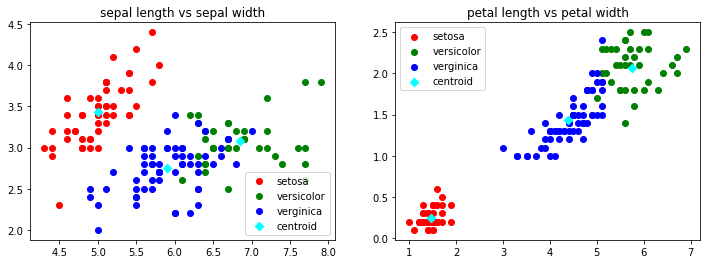

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color="red",label="setosa")
plt.scatter(df2[['sepal length (cm)']],df2[['sepal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['sepal length (cm)']],df3[['sepal width (cm)']],color="blue",label="verginica")
plt.scatter(model.cluster_centers_[:,[0]],model.cluster_centers_[:,[1]],color="cyan",label="centroid",marker='D')
plt.title('sepal length vs sepal width')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color="red",label="setosa")
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],color="blue",label="verginica")
plt.scatter(model.cluster_centers_[:,[2]],model.cluster_centers_[:,[3]],color="cyan",label="centroid",marker='D')
plt.title('petal length vs petal width')
plt.legend()

##### Note: From the above graph we can see the datapoints of the setosa and verginica are overlapping.
##### lets try to create more clear  graph.

## Using Principle Component Method (PCA)

PCA is a feature extraction method where we create new independent features from the old features.

PCA keeps only those features that are most important in predicting the target.

In [13]:
pca=PCA(n_components=2)
xp=pca.fit_transform(iris['data']) 
newdf=pd.DataFrame(xp,columns=['principle_component1','principle_component2'])
newdf['target']=model.labels_
newdf.head()

,principle_component1,principle_component2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


### plotting classified graph for dataset

Lets plot the data and see how it's look.

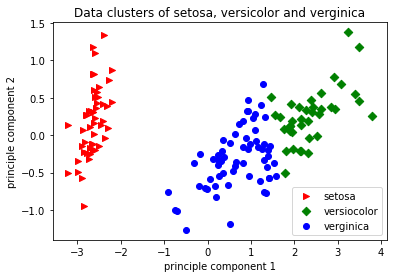

In [14]:
df1=newdf[newdf.target==0]
df2=newdf[newdf.target==1]
df3=newdf[newdf.target==2] 


plt.scatter(df1.principle_component1,df1.principle_component2,color="red",label="setosa",marker='>')
plt.scatter(df2.principle_component1,df2.principle_component2,color="green",label="versiocolor",marker='D')
plt.scatter(df3.principle_component1,df3.principle_component2,color="blue",label="verginica")
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('Data clusters of setosa, versicolor and verginica')

plt.legend()